In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 12

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 40)                1720      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 12)                372       
                                                                 
Total params: 3,322
Trainable params: 3,322
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/61 [==============>...............] - ETA: 0s - loss: 2.4272 - accuracy: 0.1423 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 1s 5ms/step - loss: 2.3179 - accuracy: 0.1910 - val_loss: 2.0152 - val_accuracy: 0.3839
Epoch 2/1000
35/61 [================>.............] - ETA: 0s - loss: 2.0000 - accuracy: 0.3167
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 3ms/step - loss: 1.9369 - accuracy: 0.3412 - val_loss: 1.6368 - val_accuracy: 0.5595
Epoch 3/1000
34/61 [===============>..............] - ETA: 0s - loss: 1.7510 - accuracy: 0.4322
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 3ms/step - loss: 1.6941 - accuracy: 0.4526 - val_loss: 1.3326 - val_accuracy: 0.5801
Epoch 4/1000
35/61 [================>.............] - ETA: 0s - loss: 1.5120 - accuracy: 0.5100


39/61 [==================>...........] - ETA: 0s - loss: 0.7795 - accuracy: 0.7236
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.7783 - accuracy: 0.7198 - val_loss: 0.3799 - val_accuracy: 0.9190
Epoch 29/1000
37/61 [=================>............] - ETA: 0s - loss: 0.7626 - accuracy: 0.7327
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.7267 - val_loss: 0.3690 - val_accuracy: 0.9287
Epoch 30/1000
37/61 [=================>............] - ETA: 0s - loss: 0.7859 - accuracy: 0.7173
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.7702 - accuracy: 0.7229 - val_loss: 0.3506 - val_accuracy: 0.9321
Epoch 31/1000
39/61 [==================>...........] - ETA: 0s - loss: 0.7493 - accuracy: 0.7314
Epoch 31

40/61 [==================>...........] - ETA: 0s - loss: 0.5934 - accuracy: 0.7891
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7824 - val_loss: 0.2324 - val_accuracy: 0.9763
Epoch 56/1000
38/61 [=================>............] - ETA: 0s - loss: 0.5990 - accuracy: 0.7784
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7827 - val_loss: 0.2316 - val_accuracy: 0.9763
Epoch 57/1000
39/61 [==================>...........] - ETA: 0s - loss: 0.5859 - accuracy: 0.7937
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7890 - val_loss: 0.2202 - val_accuracy: 0.9756
Epoch 58/1000
37/61 [=================>............] - ETA: 0s - loss: 0.6114 - accuracy: 0.7810
Epoch 58

38/61 [=================>............] - ETA: 0s - loss: 0.5396 - accuracy: 0.8094
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.8105 - val_loss: 0.1940 - val_accuracy: 0.9767
Epoch 83/1000
39/61 [==================>...........] - ETA: 0s - loss: 0.5500 - accuracy: 0.8011
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.8028 - val_loss: 0.1994 - val_accuracy: 0.9822
Epoch 84/1000
37/61 [=================>............] - ETA: 0s - loss: 0.5037 - accuracy: 0.8209
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8081 - val_loss: 0.1994 - val_accuracy: 0.9822
Epoch 85/1000
39/61 [==================>...........] - ETA: 0s - loss: 0.5417 - accuracy: 0.8093
Epoch 85

36/61 [================>.............] - ETA: 0s - loss: 0.4963 - accuracy: 0.8218
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.8235 - val_loss: 0.1860 - val_accuracy: 0.9826
Epoch 110/1000
38/61 [=================>............] - ETA: 0s - loss: 0.4948 - accuracy: 0.8252
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.8257 - val_loss: 0.1745 - val_accuracy: 0.9853
Epoch 111/1000
38/61 [=================>............] - ETA: 0s - loss: 0.4717 - accuracy: 0.8261
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.8202 - val_loss: 0.1774 - val_accuracy: 0.9845
Epoch 112/1000
40/61 [==================>...........] - ETA: 0s - loss: 0.4948 - accuracy: 0.8199
Ep

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9853


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 54: invalid start byte

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 67ms/step
[2.1187788e-01 1.5092692e-04 3.3635985e-15 8.5885011e-02 1.5038353e-06
 5.2790057e-02 6.4008343e-01 2.8367506e-10 1.0905674e-03 9.7600674e-09
 8.1205722e-03 8.9249170e-08]
6


# Confusion matrix

81/81 [==============================] - 0s 750us/step


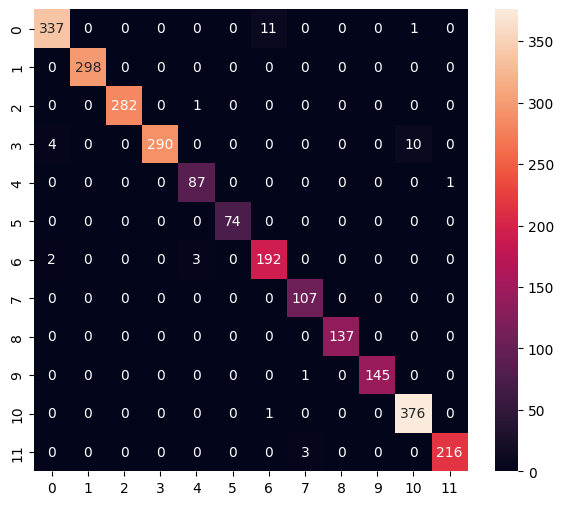

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       349
           1       1.00      1.00      1.00       298
           2       1.00      1.00      1.00       283
           3       1.00      0.95      0.98       304
           4       0.96      0.99      0.97        88
           5       1.00      1.00      1.00        74
           6       0.94      0.97      0.96       197
           7       0.96      1.00      0.98       107
           8       1.00      1.00      1.00       137
           9       1.00      0.99      1.00       146
          10       0.97      1.00      0.98       377
          11       1.00      0.99      0.99       219

    accuracy                           0.99      2579
   macro avg       0.98      0.99      0.99      2579
weighted avg       0.99      0.99      0.99      2579



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\imran\AppData\Local\Temp\tmp5w83hyb9\assets


INFO:tensorflow:Assets written to: C:\Users\imran\AppData\Local\Temp\tmp5w83hyb9\assets


6864

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.1058968e-01 1.5381743e-04 3.2706286e-15 8.6634234e-02 1.1644080e-06
 4.5310866e-02 6.4837825e-01 2.6451336e-10 1.2511538e-03 1.2245127e-08
 7.6807537e-03 8.2828166e-08]
6
